<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/PSO-Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment applies Particle Swarm Optimisation for applications in Civil Engineering

**Based on the paper:**   
Cost Optimization of No-Slump Concrete Using Genetic
Algorithm and Particle Swarm Optimization  
Hamed Naseri  
http://www.ijimt.org/vol10/832-CM0015.pdf 

**Some differences:** This code does not consider the need for a certain compressive strength range as mentioned in the paper. The only objective here is to reduce cost at the moment. **(Single Objective)**

In [ ]:
pip install pyswarms

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}


𝐶𝑜𝑠𝑡 = 𝑃C\*𝐶 + 𝑃𝑆𝐹\*𝑆𝐹 + 𝑃W\*𝑊 + 𝑃𝐹𝐴\*𝐹𝐴 + 𝑃𝐶𝐴\*𝐶𝐴 + 𝑃𝐹i\*𝐹i

where P is the unit price of each material in Iranian Rials, and the rest are the weights of each material in Kg.

Dimensions are a form of the following ordered tuple of weights:  
`[cement (c), silica fume (sf), water (w), fine aggregate (fa), coarse aggregate (ca), filler (fi)]`

In [ ]:
import numpy as np
#Creating Bounds
max_bound = np.array([410, 27.3, 139.7, 1300, 1440.6, 188])
min_bound = np.array([252.6, 0, 95, 354.2, 600, 0])
bounds = (min_bound, max_bound)

#Optimizer initialisation
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)


Now we write the objective function (aka, cost function that we need to minimize), using the _Cost_ calculation as shown earlier, and the following values:  
___________________
Material - Price/wt  
___
Cement - 1200   
Silica fume - 7000   
Water - 150   
Fine aggregate - 200   
Coarse aggregate - 120  
Filler - 280  

In [ ]:
def costFunc(x, c, sf, w, fa, ca, fi):
  f = x[:,0]*c + x[:,1]*sf + x[:,2]*w + x[:,3]*fa + x[:,4]*ca + x[:,5]*fi
  return f 

Now, we use the GBest PSO to get our optimal cost and the position, i.e. the values of weights of each

In [ ]:
#prices per unit weight
kwargs = {'c': 1200, 'sf': 7000, 'w': 150, 'fa': 200, 'ca': 120, 'fi': 280}
cost, pos =  optimizer.optimize(costFunc, 1000, **kwargs)

2020-09-05 10:36:54,124 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=4.91e+5
2020-09-05 10:36:55,812 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 491066.467667448, best pos: [2.59050549e+02 4.20856668e-01 1.05291187e+02 3.97935450e+02
 6.19926599e+02 2.67423283e+01]


From the Result above, it is seen that the best cost was `491066.47 Iranian rials`, when the weights (Kg) of each of the 6 materials are as follows:  
`[259.05, 0.42, 105.29, 397.94, 619.93, 26.74]`

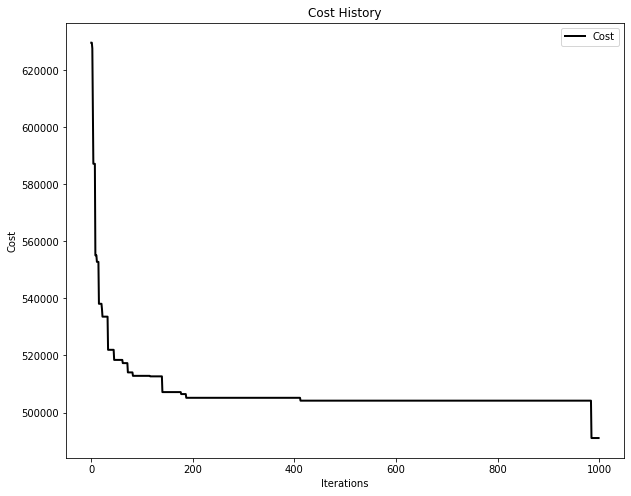

In [ ]:
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

Some observations:

- The cost suddenly reduced close to the 1000th iteration. It is possible that more changes could be seen in much further iterations

- GridSearch could be employed on the `options` (weightage given to history and local/globa best), but it would be computationally much more expensive.